## MTH 9875 The Volatility Surface:    Fall 2015

<p>

### Lecture 3: The Heston Model


Jim Gatheral   
Department of Mathematics   
  

  
  
<h3><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2014/07/BaruchLogo2.png" align = "left" width=160></h3>  


<h3><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2014/07/MFElogo.png" align = "right" width=100></h3>
   

## Outline of lecture 3

* The Heston process
* Derivation of the Heston formula for European options
* The Heston characteristic function
* Implementation of the Heston model in R
* Numerical experiments
* Simulation of the Heston model

### The Heston process

$$
\newcommand{\bea}{\begin{eqnarray}}
\newcommand{\eea}{\end{eqnarray}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E} }
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
$$
The Heston stochastic volatility model may be written as

<a name="eq:spotprocess"></a>(1)
$$
dS_t = \mu_t\, S_t\, dt + \sqrt{v_t}\,S_t \,dZ_t
$$

and

<a name="eq:varprocess"></a>(2)
$$
dv_t =  - \lambda \,(v_t - \bar v)\,dt + \eta \,\sqrt {v_t} \,dW_t
$$

with $
\left\langle {dZ_t \,{dW_t} } \right\rangle = \rho \, dt
$ and where $\lambda$ is the speed of reversion of $v_t$ to its long term
mean $\bar v$.

* The process followed by the instantaneous variance $v_t$ may be recognized as a version of the square root process or CIR process of [Cox, Ingersoll, Ross]<sup id="cite_ref-CIR" class="reference"><a href="#cite_note-CIR"><span>[</span>3<span>]</span></a></sup>.


* It is a (jump-free) special case of a so-called *affine jump diffusion (AJD)*.
  * Roughly speaking a jump-diffusion process for which the drifts and covariances and jump intensities are linear in the state vector (which is $\{ x,v \}$ in this case with $x= \log (S) $).


* [Duffie, Pan and Singleton]<sup id="cite_ref-DPS" class="reference"><a href="#cite_note-DPS"><span>[</span>4<span>]</span></a></sup> show that AJD processes are analytically tractable in general.
    * The solution technique involves computing an "extended transform" which in the Heston case is a conventional Fourier transform.

### Definition

The following explanation is due to Martin Keller-Ressel:

>An *affine process* can be described as a Markov process whose log-characteristic function is an affine 
function of its initial state vector.


And here's a definition of the word *affine* from Wikipedia:

 

>In geometry, an affine transformation or affine map or an affinity (from the Latin, *affinis*, "connected with") between two vector spaces (strictly speaking, two affine spaces) consists of a linear transformation followed by a translation:
$$
x \mapsto A\,x+b
$$



### The Heston valuation equation


In the Heston model, the value $V$ of a European-style claim is a function of $S$ and $v$ only. 
An application of Itô's Lemma gives

<a></a>(3)
$$
\beas
dV&=&\partial_t V+V\partial_S V\,dS+\partial_v V\,dv\\
&&+\frac{1}{2} \partial_{S,S} V\,dS^2+\frac{1}{2} \partial_{v,v} V\,dv^2+\partial_{S,v} V\,dv\,dS
\eeas
$$

$V(S,v,t)=\E[(S_T-K)^+|S,v]$ is a martingale so taking expectations (and again with zero rates and dividends), we obtain the valuation equation:

<a name="eq:hestonraw"></a>(4)
$$
\frac{\partial V}{\partial t} + \frac{1}{2}\,v\,S^2
\frac{\partial^2 V}{\partial S^2} + \rho \,\eta \,v
 \,S\frac{\partial^2 V}{\partial v\,\partial S}
+ \frac{1}{2}\,\eta^2\, v \,\frac{\partial^2 V}{\partial v^2}
%+r\,S\frac{\partial V}{\partial S}\,-\,r\, V \nonumber\\
- \lambda (v - \bar v)\, \frac{\partial
V}{\partial v} =0\nonumber\\
$$

### Risk-neutral and statistical (physical) measures

* In Heston's original paper, the price of risk is assumed to be linear in the instantaneous variance $v$ in order to be able to retain the form of the equation under the transformation from the statistical (or real) measure to the risk-neutral measure.


* In contrast, we assume that the Heston process with parameters fitted to option prices generates the risk-neutral measure.

    * We may set the market price of volatility risk to zero.

* Since we are only interested in pricing, and we assume that the pricing measure is recoverable from European option prices, we are indifferent to the statistical measure.

### A simpler form of the valuation equation

Before solving equation [(4)](#eq:hestonraw) with the appropriate
boundary conditions, we can simplify it by making some suitable
changes of variable.  


Let $K$ be the strike price of the option,  $S_T$ the stock price at expiration $T$ and $x := \log \left( S_T/ K \right)$.  We denote the time to expiration by $\tau:=T-t$.


Then equation [(4)](#eq:hestonraw)
simplifies to

<a name="eq:heston1"></a>(5)
$$
-\frac{\partial C}{\partial \tau } + \frac{1}{2}\,v\,C_{11} -
\frac{1}{2}\,v\,C_1  + \frac{1}{2}\,\eta^2\, v\,C_{22} + \rho\, \eta
\,v\,C_{12} \\ -\lambda (v - \bar v)\,C_2 = 0
$$

where the subscripts $1$ and $2$ refer to differentiation with
respect to $x$ and $v$ respectively.

### Form of the solution

According to [Duffie, Pan and Singleton]<sup id="cite_ref-DPS" class="reference"><a href="#cite_note-DPS"><span>[</span>5<span>]</span></a></sup>, the solution of
equation [(5)](#eq:heston1) has the form

<a name="eq:guess"></a>(6)
$$
C (x,v,\tau) =K\,\left\{ e^x \,P_1(x,v,\tau ) - P_0(x ,v ,\tau)\right\}
$$

where, exactly as in the Black-Scholes formula,

* the first term in the brackets represents the pseudo-expectation of the final index level given that the option is in-the-money

* the second term represents the pseudo-probability of exercise.

###Equations for pseudo-probabilities 

Substituting the proposed solution [(6)](#eq:guess) into equation
[(5)](#eq:heston1) implies that $P_0$ and $P_1$ must satisfy the
equation

<a name="eq:peqn"></a>(7)
\begin{eqnarray}
-\frac{{\partial P_j }}{{\partial \tau }} +
\frac{1}{2}v\frac{{\partial^2 P_j }}{{\partial x^2 }} - \left(
{{\frac{1}{2}} - j} \right)v\frac{{\partial P_j }}{{\partial x}} +
\frac{1}{2}\eta ^2 v\frac{{\partial ^2 P_j }}{{\partial v^2 }}\nonumber\\
\quad \quad \quad \quad \quad +
\rho \eta v\frac{{\partial ^2 P_j }}{{\partial x\partial v}} + (a{
} - b_j v)\frac{{\partial P_j }}{{\partial v}}& =& 0
\end{eqnarray}

for $j=0,1$ where
$
a  = \lambda \,\bar v ,\,\,\,\,b_j   = \lambda - j\,\rho\, \eta
$
subject to the terminal condition

<a name="eq:termcond"></a>(8)
\begin{eqnarray}
\lim_{\tau  \to 0} \,\,P_j (x,v,\tau ) &=& \,\left\{
\begin{array}{l} 1{ \,\, if }\,\,x > 0 \\ 0{ \,\,if \,\,}x \leq 0 \\
\end{array} \right. \nonumber \\
& := & \theta (x) 
\end{eqnarray}

### Solve using Fourier transforms

We solve equation [(7)](#eq:peqn) subject to the condition
[(8)](#eq:termcond) using a Fourier transform technique.  To this
end define the Fourier transform of $P_j$ through

$$
\tilde P(u,v,\tau) = \int_{ - \infty }^\infty \, dx \,e^{ - i\,u\,x}
\,P(x,v,\tau)
$$

Then
$$
\tilde P(u,v,0) = \int_{ - \infty }^\infty \, dx \,e^{ - i\,u\,x}
\,\theta (x) = \frac{1}{{i \,u}}
$$

The inverse transform is given by

<a name="eq:pinv"></a>(9)
$$
P(x,v,\tau ) = \int_{ - \infty }^\infty \, \frac{du}{2\pi}\,\,
e^{i\,u\,x} \,\tilde P(u,v,\tau )
$$

###Equation in Fourier space

Substituting this into equation [(7)](#eq:peqn) gives

<a name="eq:ptildeeqn"></a>(10)
\begin{eqnarray}
- \frac{\partial \tilde P_j }{\partial \tau } &-& \frac{1}{2}\,u^2
\,v\,\tilde P_j  - \left({\frac{1}{ 2}} - j \right)\,i
\,u\,v\,\tilde P_j \nonumber
\\ &+& \frac{1}{2}\,\eta ^2 \,v\,\frac{{\partial ^2 \tilde P_j
}}{{\partial v^2 }} + \rho \,\eta \,i\,u\,v\,\frac{{\partial \tilde
P_j }}{{\partial v}} + (a - b_j \,v)\,\frac{{\partial \tilde P_j
}}{{\partial v}} = 0 
\end{eqnarray}

Now define 

\begin{eqnarray*}
  \alpha  &=&  - \frac{{u^2 }}{2} - \frac{{i \,u}}{2} + i\, j \,u \\
  {\beta} &=& \lambda  - \rho \,\eta\, j - \rho\, \eta\, i\, u \\
  \gamma  &=& \frac{{\eta ^2 }}{2} \\
\end{eqnarray*}

Then equation [(10)](#eq:ptildeeqn) becomes

<a name="eq:ptildesimple"></a>(11)
$$
\begin{equation}
v\,\left\{ \alpha \,\tilde P_j  - \beta \frac{{\partial \tilde P_j
}}{{\partial v}} + \gamma\, \frac{\partial ^2 \,\tilde P_j
}{\partial v^2 } \right\} + a\,\frac{{\partial \tilde P_j
}}{{\partial v}} - \frac{{\partial \tilde P_j }}{{\partial \tau }} =
0 
\end{equation}
$$

Now substitute (the *affine ansatz*):

$$
\begin{eqnarray*} \tilde P_j (u,v,\tau )& =& \exp
\left\{ {C(u,\tau )\,\bar v + D(u,\tau )\,v} \right\}\,\tilde P_j
(u,v,0) \\
   &=& \frac{1}{{i\, u}}\exp \left\{ {C(u,\tau )\,\bar v + D(u,\tau )\,v} \right\}
\end{eqnarray*}
$$

It follows that
\begin{eqnarray*}
\frac{{\partial \tilde P_j }}{{\partial \tau }} &=&
\left\{ {\bar v\,\frac{{\partial C}} {{\partial \tau }} +
v\,\frac{{\partial D}}{{\partial \tau }}} \right\}\tilde P_j \\
\frac{{\partial \tilde P_j }}{{\partial v}}&=&
D\,\tilde P_j\\
\frac{{\partial^2 \tilde P_j }}{{\partial v^2 }} &=& D^2 \,\tilde P_j
\end{eqnarray*}

Then equation [(11)](#eq:ptildesimple) is satisfied if

<a name="eq:cdeqn"></a>(12)
\begin{eqnarray}
\frac{{\partial C}}{{\partial \tau }}
&=& \lambda \,D\nonumber \\
\frac{{\partial D}}{{\partial \tau }}
&=& \alpha  - \beta\,D +\gamma \,D^2\nonumber  \\
&=& \gamma \,(D - r_ +  )(D - r_ -  )
\end{eqnarray}

where we define

$$
r_ \pm   = \frac{{\beta  \pm \, \sqrt {\beta ^2  - 4\alpha \gamma }
}}{{2\gamma }} =: \frac{{\beta  \pm d}}{{\eta ^2 }}
$$

Integrating [(12)](#eq:cdeqn) with the terminal conditions $C(u,0)=0$
and $D(u,0)=0$ gives

<a name="eq:hestonCD"></a>(13)
\begin{eqnarray}
D(u,\tau ) &=& r_ -  \frac{{1 - e^{ - d\,\tau } }}{{1 - g\,e^{ -
d\,\tau } }} \nonumber\\ C(u,\tau ) &=& \lambda \,\left\{ {r_ - \tau
- \frac{2}{{\eta ^2 }}\,\log\left( {\frac{{1 - g\,e^{ - d\,\tau }
}}{{1 - g}}} \right)} \right\}
\end{eqnarray}

where we define

$$
g := \frac{{r_ -  }}{{r_ +  }}.
$$

###The Heston formula
We then arrive at our final result:

<blockquote><div style="background-color:#add8e6; color:#FFFFFF; font-style: normal;  " ><h4>
The Heston formula</h4>
</div>
<div style="background-color:#E8E8E8; color:#000000; font-style: normal; ">
<br>
$$
C (x,v,\tau) =K\,\left\{ e^x \,P_1(x,v,\tau ) - P_0(x ,v ,\tau)\right\}
$$
<br>
</div>
</blockquote>

where the pseudo-probabilties $P(\cdot)$ are obtained by inverting the $\tilde P(\cdot)$ using [(9)](#eq:pinv):

<blockquote>
<div style="background-color:#E8E8E8; color:#000000; font-style: normal; ">
<br>
<a name="eq:hestonformula"></a>(14)
$$
P_j (x,v,\tau ) =\frac{1}{2} + \frac{1}{\pi }\,\int_0^\infty \,
{du} \,\mathop{Re} \left\{ {\frac{{\exp \{ C_j (u,\tau )\,\bar v +
D_j(u,\tau )\,v + i\,u\,x\} }}{{i\,u}}} \right\}.
$$
<br>
</div>
</blockquote>


This integration of a real-valued function may be performed using standard numerical
methods.

###Heston greeks

It is worth noting that taking derivatives of the Heston formula
with respect to $x$ or $v$ in order to compute delta, gamma, vega and so on is
extremely straightforward because the functions $C(u,\tau)$ and
$D(u,\tau)$ are independent of $x$ and $v$.

###A digression: the complex logarithm in the integration [(14)](#eq:hestonformula)

In Heston's original paper and in most other papers on the subject,
$C(u,\tau)$ is written (almost) equivalently as

<a name="eq:hestonc"></a>(15)
$$
C(u,\tau ) =\lambda \,\left\{ {r_+  \tau  - \frac{2}{{\eta ^2
}}\,\log \left( {\frac{{e^{ + d\,\tau } - g }}{{1 - g}}} \right)}
\right\}
$$

The reason for the qualification "almost" is that this definition
coincides with our previous one only if the imaginary part of the
complex logarithm is chosen so that $C(u,\tau )$ is continuous with
respect to $u$. 


 It turns out that taking the principal value of the
logarithm in [(15)](#eq:hestonc) causes $C(u,\tau )$ to jump
discontinuously each time the imaginary part of the argument of the
logarithm crosses the negative real axis. 



###BCC parameters

[Bakshi, Cao and Chen]<sup id="cite_ref-BCC" class="reference"><a href="#cite_note-BCC"><span>[</span>2<span>]</span></a></sup> found (more or less) the following Heston (SV) parameters  in a fit of the Heston model to historical volatility surfaces:

<div align="center">Table 1: BCC parameters 
<p>

$v$|$0.04$
------: | -------------:
$\bar v$|$0.04$
$\lambda$|$1.15$
$\eta$|$0.39$
$\rho$|$-0.64$

###A numerical example with BCC parameters

Recall the two versions of $C(u,\tau)$ from [(13)](#eq:hestonCD) and [(15)](#eq:hestonc) respectively:

$$
C^{JG}(u,\tau ) = \lambda \,\left\{ {r_ - \tau
- \frac{2}{{\eta ^2 }}\,\log\left( {\frac{{1 - g\,e^{ - d\,\tau }
}}{{1 - g}}} \right)} \right\}
$$

and

$$
C^{Heston}(u,\tau ) =\lambda \,\left\{ {r_+  \tau  - \frac{2}{{\eta ^2
}}\,\log \left( {\frac{{e^{ + d\,\tau } - g }}{{1 - g}}} \right)}\right\}
$$

Setting $\tau=1$, and with BCC parameters, we get the following plots:


### Comparison plot



<h3><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2014/09/bigC.png" align = "left" width=600></h3>  

Figure 1: $C^{Heston}(\cdot)$ in red, $C^{JG}(\cdot)$ in green.

###Solutions in the literature


One conventional
resolution is to keep careful track of the winding number in the
integration [(14)](#eq:hestonformula) so as to remain on the same
Riemann sheet. 

This leads to practical implementation problems
because standard numerical integration routines cannot be used.  The
paper of [Kahl and Jäckel]<sup id="cite_ref-KJ" class="reference"><a href="#cite_note-KJ"><span>[</span>10<span>]</span></a></sup> concerns itself with this
problem and provides an ingenious resolution.

###A better solution

* With *our* definition [(13)](#eq:hestonCD) of $C(u,\tau)$,  whenever the imaginary part of the argument of the logarithm is zero, the real part is positive.

    * Plotted in the complex plane, the argument of the logarithm never cuts the negative real axis.
    * This result was proved by [Albrecher, Mayer, Schoutens and Tistaert]<sup id="cite_ref-AMST" class="reference"><a href="#cite_note-AMST"><span>[</span>1<span>]</span></a></sup>.


* It follows that with our definition of $C(u,\tau)$, taking the principal value of the logarithm leads to a continuous integrand over the full range of integration.

###Characteristic functions and option prices


To a mathematician, it may appear perverse to
first derive the option pricing formula then impute the
characteristic function: the reverse might appear more natural.


However, in the context of understanding the volatility surface,
option prices really are primary and it makes just as much sense for
us to deduce the characteristic function from the option pricing
formula as it does for us to deduce the risk-neutral density from
option prices.


The following are equivalent in the sense that given one of these, all of the others may be derived:

* All $T$ expiration European option prices.
* The $T$ expiration risk-neutral density.
* The $T$ expiration implied volatilities.
* The $T$ expiration characteristic function.

###The Heston tail distribution

By definition, the
characteristic function is given by

$$
\phi _T(u):= \mathbb{E}\left[e^{i u x_T}~|~x_t=0\right]
$$

The probability of the final log-stock price $x_T$ being greater
than the strike price is given by

\begin{eqnarray*}
\mathbf{Pr}(x_T > x)&=& P_0 (x,v,\tau )\\& =& \frac{1}{2} + \frac{1}{\pi
}\,\int_0^\infty\, {du} \,{\mathop{ Re}} \left\{ {\frac{{\exp \{ C
(u,\tau )\,\bar v + D (u,\tau )\,v + i\,u \,x\} }}{{iu}}} \right\}
\end{eqnarray*}
with $x=\log(S_t/K)$ and $\tau=T-t$. 

###The Heston marginal density

Let the log-strike $k$ be
defined by $k=\log(K/S_t)=-x$. Then, the probability density
function $p(k)$ must be given by

\begin{eqnarray*}
p(k)&=&-\frac{\partial P_0}{\partial k}\\&=&\frac{1}{2 \pi
}\int_{-\infty}^\infty  {du'} \, {{{\exp \{ C (u',\tau )\,\bar v + D
(u',\tau )\,v - i\,u' \,k\} }}}
\end{eqnarray*}

Then

<a name="eq:hestoncharfn"></a>(16)
\begin{eqnarray*}
\phi _T(u)&=&\int_{-\infty}^\infty  {dk} \,p(k)\,e^{i \,u \,k}\nonumber\\
&=&\frac{1}{2 \pi }\int_{-\infty}^\infty  {du'} \, {{{\exp \{ C
(u',\tau )\,\bar v + D (u',\tau )\,v \} }}}\int_{-\infty}^\infty
\,{du} \,e^{i (u-u') k}\nonumber\\
&=&\int_{-\infty}^\infty  {du'} \, \exp \{ C (u',\tau )\,\bar v + D
(u',\tau )\,v \}\, \delta (u-u')\nonumber\\
&=&\exp \{ C (u,\tau )\,\bar v + D (u,\tau )\,v \}
\end{eqnarray*}

###The Heston characteristic function

For emphasis:

<blockquote><div style="background-color:#add8e6; color:#FFFFFF; font-style: normal;  " ><h4>
The Heston characteristic function</h4>
</div>
<div style="background-color:#E8E8E8; color:#000000; font-style: normal; ">
<br>
$$
\phi _T(u)=\exp \left\{ C (u,\tau )\,\bar v + D (u,\tau )\,v \right\}
$$
<br>
</div>
</blockquote>


###The Heston density

We may then compute the Heston probability density function by Fourier inversion as:

<a name="eq:HestonDensity"></a>(17)
\begin{eqnarray*}
p(y,\tau)&=&
\int_{ - \infty }^\infty \, \frac{du}{2\pi}\,
e^{-i\,u\,y} \,\phi _T(u)\nonumber\\
&=&\frac{1}{\pi}\,\int_0^\infty \, du\,{\mathop{ Re}} \left[\exp \left\{ C (u,\tau )\,\bar v + D (u,\tau )\,v -i\,u\,y\right\} \right]
\end{eqnarray*}

* Note that $y=\log S_T/S_t$ is the forward variable.


###Autocorrelation of variance in the Heston model

The autocorrelation function of variance is estimated as 

$$
\rho(\tau)\sim\frac{\Cov (v_t, v_{t+\tau} )}{\Var(v_t)}
$$

To compute this, first compute
$$
\E\left[\left.v_{t+\tau}\right|v_t\right]=\bar v+(v_t-\bar v)\,e^{-\lambda\, \tau}
$$

The unconditional expectation of $v_t$ is $\bar v$ so we get

\begin{eqnarray*}
\Cov\left[v_{t+\tau},v_t\right]&=&\E\left[\E\left[v_{t+\tau}\,v_t|v_t\right]\right]-\bar v^2\\
&=&\E\left[v_t\,(\bar v +(v_t-\bar v)\,e^{-\lambda\,\tau})\right]-\bar v^2\\
&=&e^{-\lambda\,\tau}\,\Var[v_t]
\end{eqnarray*}

and the autocorrelation function in the Heston model is just
$$
\rho(\tau)=e^{-\lambda\,\tau}.
$$


###Autocorrelation of SPX squared returns

In Lecture 1, we proxied instantaneous variance with squared returns.

First download data using `quantmod`:

In [1]:
library(quantmod)

#Get SPX and VIX data from Yahoo!
options("getSymbols.warning4.0"=FALSE)
getSymbols("^GSPC",from="1927-01-01") #Creates the time series object GSPC

px <- Cl(GSPC) # Built-in quantmod function to get close

ret <- log(px/lag(px)) 
ret <- ret[!is.na(ret)] # Remove missing values
ret <- ret-mean(ret) 

Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: TTR
Version 0.4-0 included new data defaults. See ?getSymbols.


[1] "GSPC"

Next, plot the autocorrelation of squared returns.


Call:
lm(formula = logacf.r2[-(1:15)] ~ loglag.r2[-(1:15)])

Coefficients:
       (Intercept)  loglag.r2[-(1:15)]  
           -1.0456             -0.5311  


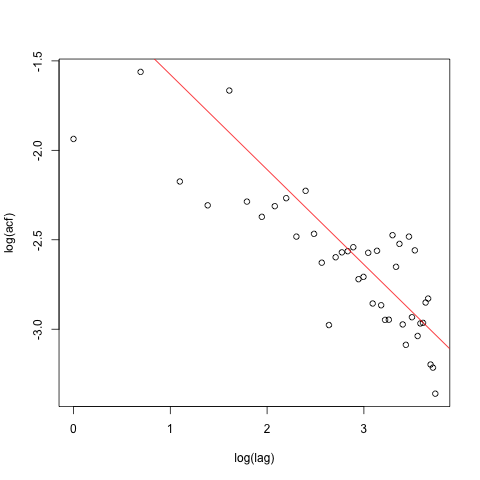

In [2]:
acf.r2 <- acf(ret^2,main=NA,plot=FALSE)
logacf.r2 <- log(acf.r2$acf)[-1]  
loglag.r2 <- log(acf.r2$lag)[-1] 
plot(loglag.r2,logacf.r2,xlab="log(lag)",ylab="log(acf)") 
(acfr2.lm <- lm(logacf.r2[-(1:15)]~loglag.r2[-(1:15)]) )
abline(acfr2.lm,col="red") 

Figure 2: Slope of fit is around $-0.48$ so autocorrelation decays roughly as $t^{-.48}$.

###Autocorrelation plots from [Perelló et al.]<sup id="cite_ref-PerelloEtAl" class="reference"><a href="#cite_note-PerelloEtAl"><span>[</span>11<span>]</span></a></sup>


<h3><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2014/09/Perello.png" align = "left" width=700></h3> 

###Model versus empirical observation

* Empirically, the variance autocorrelation function $\sim 1/\sqrt{\tau}$.


* In the Heston model, the variance autocorrelation function $\sim \exp\left\{-\lambda\,\tau\right\}$.
    
    * This is true for all conventional one-factor stochastic volatility models where the volatility process is of the form:

$$
dv=-\lambda\,(v-\bar v)\,dt +\text{ noise}.
$$


* We can match the autocorrelation function more realistically by adding another timescale as in the DMR model we presented in Lecture 2.
    * Or even better, we can reproduce the observed autocorrelation function using our new Rough Volatility model<sup id="cite_ref-GJR" class="reference"><a href="#cite_note-GJR"><span>[</span>6<span>]</span></a></sup>.

### Implementation of the Heston model in R

* In the next few slides, we will exhibit an implementation of  the Heston model in R.


* We can then develop some intuition for the behavior of the model through experiment.

###Black-Scholes

First, we need an implementation of the Black-Scholes formula (this is in `BlackScholes.R`).

In [3]:
BSFormula <- function(S0, K, T, r, sigma)
{
    x <- log(S0/K)+r*T
    sig <- sigma*sqrt(T)
    d1 <- x/sig+sig/2
    d2 <- d1 - sig
    pv <- exp(-r*T)
    return( S0*pnorm(d1) - pv*K*pnorm(d2))
}

###Implied volatility computation

Then, we need an implied volatility computation (this is also in `BlackScholes.R`).

In [4]:
BSImpliedVolCall <- function(S0, K, T, r, C)
{
    nK <- length(K)
    sigmaL <- rep(1e-10,nK)
    CL <- BSFormula(S0, K, T, r, sigmaL)
    sigmaH <- rep(10,nK)
    CH <- BSFormula(S0, K, T, r, sigmaH)
    while (mean(sigmaH - sigmaL) > 1e-10)
    {
        sigma <- (sigmaL + sigmaH)/2
        CM <- BSFormula(S0, K, T, r, sigma)
        CL <- CL + (CM < C)*(CM-CL)
        sigmaL <- sigmaL + (CM < C)*(sigma-sigmaL)
        CH <- CH + (CM >= C)*(CM-CH)
        sigmaH <- sigmaH + (CM >= C)*(sigma-sigmaH)
      }
    return(sigma)
}

### A numerical example

First generate some option prices.

In [5]:
vols <- c(0.23,0.20,0.18)
K <- c(0.9,1.0,1.1) 
(optVals <- BSFormula(S0=1,K,T=1,r=0,sigma=vols))

[1] 0.14589696 0.07965567 0.03557678

Then compute implied volatilities.

In [6]:
(impVols <- BSImpliedVolCall(S0=1, K, T=1, r=0, C=optVals))

[1] 0.23 0.20 0.18

###Heston formula

In [7]:
callHeston <- function(params){
    
    lambda <- params$lambda
    rho <- params$rho
    eta <- params$eta
    vbar <- params$vbar
    v <- params$v
    
    res <- function(k,t){
        fj <- function(u, t, j){

            al <- -u*u/2 - 1i*u/2 + 1i*j*u
            bet <- lambda - rho*eta*1i*u-rho*eta*j
            gam <- eta^2/2
            d <- sqrt(bet*bet - 4*al*gam)
            rp <- (bet + d)/(2*gam)
            rm <- (bet - d)/(2*gam)
            g <- rm / rp
            D <- rm * (1 - exp(-d*t))/ (1 - g*exp(-d*t))
            C <- lambda * (rm * t - 2/eta^2 * log( (1 - g*exp(-(d*t)))/(1 - g) ) )
            return(exp(C*vbar + D*v))
        } 
        x <- -k
        p1 <- 1/2+1/pi*integrate(function(u){Re(fj(u,t,1)*exp(1i*u*x)/(1i*u))},lower=0,upper=Inf)$value
        p0 <- 1/2+1/pi*integrate(function(u){Re(fj(u,t,0)*exp(1i*u*x)/(1i*u))},lower=0,upper=Inf)$value
        return(exp(k)*(exp(x)*p1-p0))
    }
    return(res)  # Return price of Heston call expressed as percentage of spot.
}

###Some notable features of R



* Complex arithmetic with $\text{1i}$.

* Functional programming:
    * This is what allows us to code a function which is called as: 
    
            callHeston(params)(k,T)
    
    * We can define a function that returns a function (and so on indefinitely).
    
    * We could even conveniently define a new function: 
          
            callHestonBCC <- callHeston(subBCC)

    * We can conceptually separate parameters and variables rather than having to carry all the parameters around with each function call.

###The Heston smile with BCC parameters

First we list the BCC parameters.

In [8]:
subBCC <- list(lambda = 1.15,rho = -0.64,eta = 0.39,vbar = 0.04,v = .04)

Then we need a function to compute Heston implied volatilities.

In [9]:
impvolHeston <- function(params){
    function(k, t){
        BSImpliedVolCall(1, exp(k), t, 0, callHeston(params)(k,t))
        }
    }

Now finally, we can plot the Heston volatility smile with BCC paramets

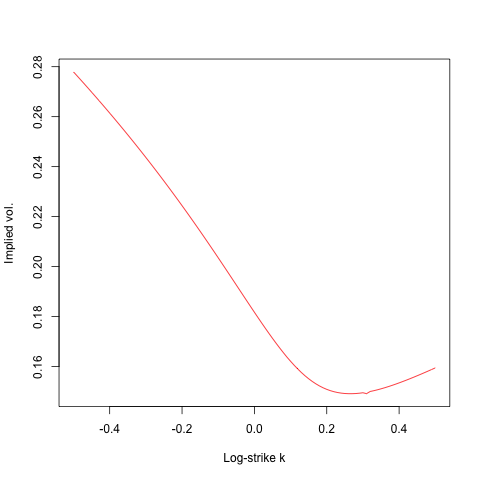

In [10]:
vol <- function(k){sapply(k,function(x){impvolHeston(subBCC)(x,1)})}
curve(vol(x),from=-.5,to=.5,col="red",ylab="Implied vol.",xlab="Log-strike k")

Figure 3: The $\tau=1$ Heston smile with BCC parameters.

###Sensitivity of the Heston smile to $\rho$

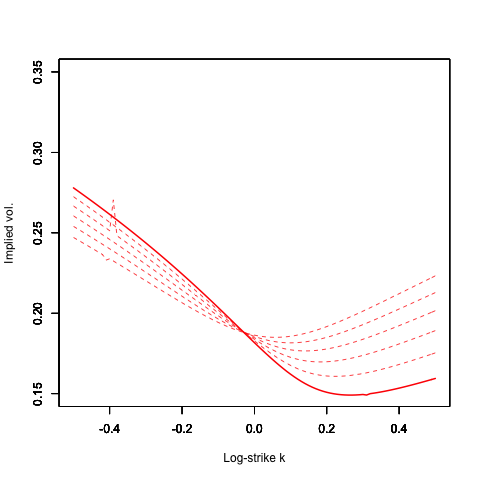

In [11]:
subH <- function(incr){
    tmp <- subBCC
    tmp$rho <- tmp$rho+incr
    return(tmp)
}

yrange <- c(0.15,.35)
vol <- function(k){sapply(k,function(x){impvolHeston(subBCC)(x,1)})}
curve(vol(x),from=-.5,to=.5,col="red",ylim=yrange,lwd=2,ylab="Implied vol.",xlab="Log-strike k")
for (incr in seq(0.1,0.5,0.1))
    {
        for (i in 1:100000){tmp=i}
        par(new=T)
        vol <- function(k){sapply(k,function(x){impvolHeston(subH(incr))(x,1)})
    }
    curve(vol(x),from=-.5,to=.5,col="red",lty=2,ylim=yrange,ylab=NA,xlab=NA)
}

Figure 4: The dotted lines are smiles with $\rho=\rho_{BCC}+\{0.1,0.2,0.3,0.4,0.5\}$.

###Sensitivity of the Heston smile to $\eta$

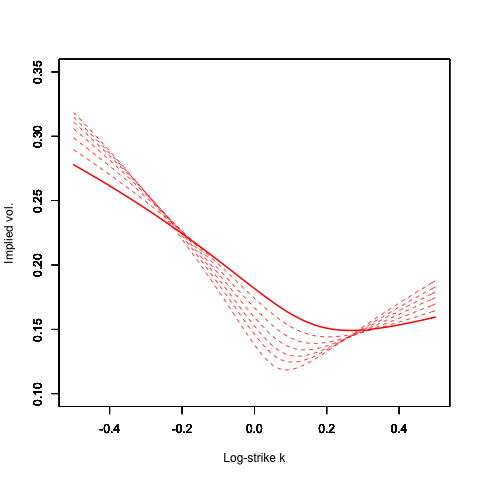

In [12]:
subH <- function(incr){
    tmp <- subBCC
    tmp$eta <- tmp$eta+incr
    return(tmp)
}

yrange <- c(0.1,.35)
vol <- function(k){sapply(k,function(x){impvolHeston(subBCC)(x,1)})}
curve(vol(x),from=-.5,to=.5,col="red",ylim=yrange,lwd=2,ylab="Implied vol.",xlab="Log-strike k")
for (incr in c(seq(0.1,0.5,0.1),0.64))
    {
    for (i in 1:100000){tmp=i}
    par(new=T)
    vol <- function(k){sapply(k,function(x){impvolHeston(subH(incr))(x,1)})
    }
    curve(vol(x),from=-.5,to=.5,col="red",lty=2,ylim=yrange,ylab=NA,xlab=NA)
}


Figure 5: The dotted lines are smiles with $\eta=\eta_{BCC}+\{0.1,0.2,0.3,0.4,0.5\}$. 

###Sensitivity of the Heston smile to $\lambda$


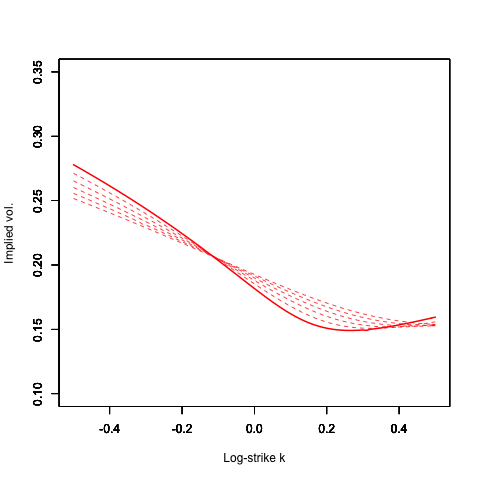

In [18]:
subH <- function(incr){
    tmp <- subBCC
    tmp$lambda <- tmp$lambda+incr
    return(tmp)
}

yrange <- c(0.1,.35)
vol <- function(k){sapply(k,function(x){impvolHeston(subBCC)(x,1)})}
curve(vol(x),from=-.5,to=.5,col="red",ylim=yrange,lwd=2,ylab="Implied vol.",xlab="Log-strike k")
for (incr in seq(0.5,2.5,0.5))
    {
        for (i in 1:100000){tmp=i}
        par(new=T)
        vol <- function(k){sapply(k,function(x){impvolHeston(subH(incr))(x,1)})
    }
curve(vol(x),from=-.5,to=.5,col="red",lty=2,ylim=yrange,ylab=NA,xlab=NA)
}


Figure 6: The dotted lines are smiles with $\lambda=\lambda_{BCC}+\{0.5,1.0,1.5,2.0,2.5\}$.

###Another sensitivity plot

Now increase both $\lambda$ and $\eta$ keeping the ratio $\eta^2/\lambda$ constant.

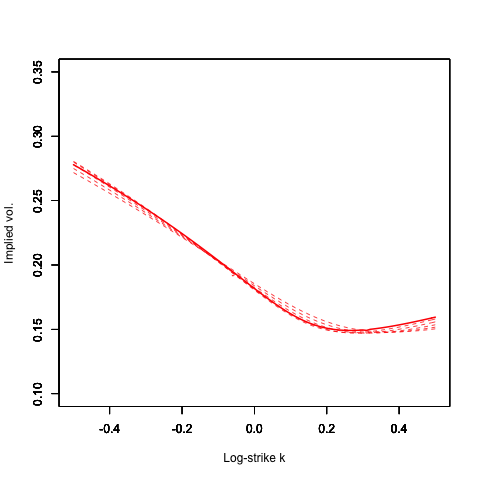

In [19]:
subH <- function(incr){
    tmp <- subBCC
    tmp$eta <- tmp$eta+incr
    tmp$lambda <- tmp$lambda*(tmp$eta/subBCC$eta)^2
    return(tmp)
}

yrange <- c(0.1,.35)
vol <- function(k){sapply(k,function(x){impvolHeston(subBCC)(x,1)})}
curve(vol(x),from=-.5,to=.5,col="red",ylim=yrange,lwd=2,ylab="Implied vol.",xlab="Log-strike k")
for (incr in seq(0.1,0.5,0.1))
    {
    for (i in 1:100000){tmp=i}
    par(new=T)
    vol <- function(k){sapply(k,function(x){impvolHeston(subH(incr))(x,1)})
    }
curve(vol(x),from=-.5,to=.5,col="red",lty=2,ylim=yrange,ylab=NA,xlab=NA)
}



Figure 7: The dotted lines are smiles with $\eta=\eta_{BCC}+\{0.1,0.2,0.3,0.4,0.5\}$ and $\lambda$ incremented so as to keep the ratio $\lambda/\eta^2$ constant. 

###Variance of instantaneous variance in the Heston model

Applying Itô's Lemma, we get

$$
d v^2= 2\,v\,dv+(dv)^2
$$

With $\hat v = \E[v]$, this gives

$$
\E[ d v^2]=-2\,\lambda\,\left(\E[v^2]-\bar v\,\hat v\right)\,dt+\eta^2\,\hat v\,dt
$$

Also

$$
d \hat v^2=-2\,\lambda\,\left(\hat v^2-\bar v\,\hat v\right)\,dt
$$

So
$$
d \Var(v)=-2\,\lambda\,\Var(v)\,dt+\eta^2\,\hat v\,dt
$$

Integrating, we get

$$
\Var(v_T)=\int_0^T\,e^{-2\,\lambda\,(T-t)}\,\eta^2\,\hat v_t\,dt
$$

Putting $\hat v = \bar v$ for simplicity, we obtain

\begin{eqnarray*}
\Var(v_T)&=&\eta^2\,\bar v\,\int_0^T\,e^{-2\,\lambda\,(T-t)}\,dt\\
&=&\eta^2\,\bar v\,\frac{1-e^{-2\,\lambda\,T}}{2\,\lambda}\\
&\to&\frac{\eta^2\,\bar v}{2\,\lambda} \text{ as }T \to \infty
\end{eqnarray*}

* The smile depends only on the distribution of integrated variance and its correlation with the stock price, so for longer expirations, the smile should depend (roughly) only on $\rho$ and the ratio $\eta^2\,\bar v/\lambda$.

## Simulation of the Heston model

###Numerical computation under stochastic volatility

* The popularity of the Heston model relates to the existence of a quasi-closed-form formula for European option prices.

    * To value other types of option, even American options, numerical computations are required.


* For other more realistic dynamics, numerical computation is always required.

    * For example, consider the much more realistic (lognormal) variance process:
    
$$
dv=-\lambda\,(v-\bar v)\,dt+\xi\,v\,dZ.
$$

* The two numerical techniques that are typically employed are:
    * Numerical PDE,
    * Monte Carlo simulation.

###Feynman-Kac

The Feynman-Kac formula relates the solution of a diffusion PDE to a probabilistic expectation, which may be computed using Monte Carlo simulation.


Specifically, consider the SDE

$$
dx_t=\mu_t\,dt+\sigma_t\,dZ_t
$$

and consider the discounted expectation of some function $V(x_T)$ of the terminal value $x_T$.  Then, applying Itô's Lemma to

$$
f(x_t,t)=e^{-\int_0^t\,r_s\,ds}\,V(x_t,t),
$$

we obtain

$$
df=-r_t\,f\,dt+e^{-\int_0^t\,r_s\,ds}\,\partial_t V\,dt+\partial_x f\,dx+\frac{\sigma_t^2}2\,\partial_{x,x} f\,dt
$$

Then, if $V(x,t)$ satisfies the PDE

$$
\partial_t V+\frac{\sigma_t^2}2\,\partial_{x,x} V+\mu_t\,\partial_x V-r_t\,V=0,
$$

we have $\E[df]=0$ and

$$
\E[f(x_T,T)]-f(x_t,t)=\int_t^T\,\E[df(x_s,s)]\,ds=0
$$

Rearranging gives

<blockquote><div style="background-color:#add8e6; color:#FFFFFF; font-style: normal;  " ><h4>
The Feynman-Kac formula</h4>
</div>
<div style="background-color:#E8E8E8; color:#000000; font-style: normal; ">
<br>
$$
V(x_t,t)=\E\left[e^{-\int_t^T\,r_s\,ds}\,V(x_T,T)\right]
$$
<br>
</div>
</blockquote>



In our case, we assume zero interest rates and the terminal condition is of the form $V(x,T) = g(x)$.  Then our problem is to compute

$$
V(x_t,t)=\mathbb{E}\left[V(x_T,T)|\mathcal{F}_t\right]= \mathbb{E}\left[g(x_T)|\mathcal{F}_t\right].
$$


###Implications for valuation of claims under stochastic volatility

* Risk-neutral (discounted) expectations of final payoffs may be valued using:

    * Numerical PDE,
    * Monte Carlo simulation.

* We may use whichever technique is more convenient.

* Numerical PDE techniques are well-explained in [Tavella and Randall]<sup id="cite_ref-TavellaRandall" class="reference"><a href="#cite_note-TavellaRandall"><span>[</span>9<span>]</span></a></sup>.

* We will focus on Monte Carlo simulation.

* Simulation

     * is in general easier to understand,
     * is less reliant on specialized artisanal knowledge,
     * can deal with higher dimensional processes (no *curse of dimensionality*).

###Euler-Maruyama

* A very popular method to compute $\mathbb{E}\left[g(x_T)\right]$ is to use the Euler-Maruyama (EM) scheme.


* Specifically, choose $n$ independent random variables $\{Y_1,...,Y_n\}$ such that if $Z\sim N(0,1)$, 
$\mathbb{E}\left[p(Y_k)\right]=\mathbb{E}\left[p(Z)\right]$ for all polynomials of degree less than or equal to 3.


* Then, with $\Delta = (T-t)/n$ and $s=t+k\,\Delta$, define recursively

$$
x_{s+\Delta} = x_s + \mu\,\Delta + \sigma\,\sqrt{\Delta}\,Y_s.
$$


* If for example, the $Y_n$ were Bernoulli random variables, $\mathbb{E}\left[g(x_T)\right]$ would be computed as a sum of $2^n$ terms.

    * In practice of course, one would approximate this sum using Monte Carlo (MC) or quasi-Monte Carlo (QMC) methods.

###Weak and strong convergence

From page 327 of [Kloeden and Platen]<sup id="cite_ref-KloedenPlaten" class="reference"><a href="#cite_note-KloedenPlaten"><span>[</span>8<span>]</span></a></sup>, a time discretization $\hat X$ with time increment $\Delta$ *converges weakly with order $\beta$* if there exists a constant $C$ such that

$$
\left|\E\left[g(\hat X_T)\right]-\E\left[g(X_T)\right]\right|\leq C\,\Delta^\beta
$$
as $\Delta \to 0$.


From page 323 of [Kloeden and Platen]<sup id="cite_ref-KloedenPlaten" class="reference"><a href="#cite_note-KloedenPlaten"><span>[</span>7<span>]</span></a></sup>, $\hat X$ with time increment $\Delta$ *converges strongly with order $\beta$* if there exists a constant $C$ such that

$$
\E\left[\left|\hat X_T-X_T\right|\right]\leq C\,\Delta^\beta
$$
as $\Delta \to 0$.


* The exponent $\beta$ is called the *order* of convergence.

###Monte Carlo simulation

Monte Carlo simulation proceeds in two steps:

1. Discretize the SDE with time step $\Delta = T/m$, denoting the discretized process by $\hat X_t$. This step induces a weak error
<br><br>$$
\epsilon_D = \E[g(X_T)] - \E[g(\hat X_T)] \sim \Delta^\beta.
$$<br>

2. Estimate the expectation of the discretized process as
<br><br>$$
\E[g(\hat X_T)] = \frac{1}{N}\,\sum_{i=1}^N\,g(\hat X_T^{(i)}).
$$

    This step induces a statistical error

$$
\epsilon_S = \E[g(\hat X_T)] -  \frac{1}{N}\,\sum_{i=1}^N\,g(\hat X_T^{(i)}) \sim \frac{1}{\sqrt{N}}. 
$$


<!--
* For example, the Euler discretization of [(2)](#eq:SDE) would read
$$
\hat X_{i+1} = \hat X_i + a_i\,\Delta + b_i\,\Delta W.
$$
-->

###Mean squared error (MSE)

If $\hat x$ is an estimator of some quantity $x$ (a Monte Carlo estimate for example), then

$$
\begin{eqnarray}
\mbox{MSE}(\hat x)&=&\E[(\hat x-x)^2]\\
&=&\left(\E[\hat x]-x\right)^2+\E\left[\left(\hat x-\E[\hat x]\right)^2\right]\\
&=&\text{Bias}^2(\hat x)+\text{Variance}(\hat x).
\end{eqnarray}
$$

* Monte Carlo bias relates to the discretization.

     * The number of timesteps and how accurately the target process is approximated over each timestep.


* The variance relates to the number of samples and how variance is reduced.

    

###Computational complexity

* Following page 365 of [Glasserman]<sup id="cite_ref-Glasserman" class="reference"><a href="#cite_note-Glasserman"><span>[</span>7<span>]</span></a></sup>, denoting MSE by $\epsilon^2$, we have

<a name="eq:MSE"></a>(18)
$$
\epsilon^2 \sim \epsilon_D^2 + \epsilon_S^2 = c_1\,\Delta^{2\,\beta} + \frac{c_2}{N} 
$$

for some constants $c_1$ and $c_2$.

* The computational cost $\mathcal{C}$ is is proportional to

$$
m \times N  = \frac{T}{\Delta}\,N
$$

so

$$
\epsilon^2 \sim c_1\,\Delta^{2\,\beta} + \frac{c_3}{\mathcal{C}\,\Delta} 
$$

for some $c_3$. 

* Minimizing MSE for fixed cost $\mathcal{C}$ gives

$$
\Delta \propto \mathcal{C}^{-\frac{1}{2\,\beta + 1}}.
$$

###Optimal allocation of computational budget

Substituting back into [(18)](#eq:MSE), we obtain

$$
\epsilon^2 \sim c_1\,\mathcal{C}^{-\frac{2\,\beta}{2\,\beta + 1}} + c_2\,T\,\mathcal{C}^{-\frac{2\,\beta}{2\,\beta + 1}} \propto \mathcal{C}^{-\frac{2\,\beta}{2\,\beta + 1}}.
$$

The optimal allocation thus balances bias squared and variance.

* For the Euler scheme with Lipschitz payoff, $\beta = 1$ so $\epsilon \sim \mathcal{C}^{-1/3}$.
* For the Milstein scheme with Lipschitz payoff, $\beta = 2$ so $\epsilon \sim \mathcal{C}^{-2/5}$.
* If the discretization is unbiased,  $\epsilon \sim \mathcal{C}^{-1/2}$.

Thus, in the limit where very high accuracy is required, the better the discretization, the lower the computational cost.

* Although in practice, we have to take into account that a better discretization may involve more computation per time step.

###Why fast Monte Carlo?

* For pricing, a not-very-fast Monte Carlo routine might suffice.


* For model calibration, we need fast Monte Carlo.

    * Fitting a model to the data involves many calls to the pricing routine with different parameter sets.


* However fast Monte Carlo is only needed for European options.

    * We want to calibrate complex models to vanilla option prices.
    
    * Even if vanilla options are American-style, we can fairly accurately approximate Black-Scholes implied volatility.


* We are then only concerned with the order of weak convergence.

    * In contrast, the order of strong convergence may be relevant for barrier or lookback options.

###Heston simulation: General remarks

* Heston is popular because there is a quasi-closed form formula for European options.


* The Heston model is in fact very tricky to simulate.
    * This relates to the propensity of the Heston variance process to go to zero.
    * This same property makes Heston dynamics very unrealistic.
    

* If we can figure out how to simulate Heston efficiently, other stochastic volatility models will be easier.

###Variations on the BCC parameters

In numerical examples, we will consider the following parameter sets with $\eta$ halved and doubled relative to BCC:

<div align="center">Table 1: BCC and BCC2 parameters 

  |BCC|BCC1|BCC2
:------:|:------:|:----------:|:------:
$v$|$0.04$|$0.04$|$0.04$
$\bar v$|$0.04$|$0.04$|$0.04$
$\lambda$|$1.15$|$1.15$|$1.15$
$\rho$|$-0.64$|$-0.64$|$-0.64$
$\eta$|$~~0.39~~$|$~~0.39/2~~$|$~~0.39\times 2~~$
$~~\frac{2\,\lambda\,\bar v}{\eta^2}~~$|$0.60$|$2.42$|$0.15$

###Boundary behaviors of variance processes

Consider a fairly generic variance process:

<a name="eq:HestonVariance"></a>(4)
$$
dv=-\lambda\,(v-\bar v)\,dt+\eta\,v^\alpha\,dZ
$$

<blockquote><div style="background-color:#add8e6; color:#FFFFFF; font-style: normal;  " ><h4>
Proposition 2.1 of Andersen and Piterbarg</h4>
</div>
<div style="background-color:#E8E8E8; color:#000000; font-style: normal; ">
<br>
For the process [(4)](#eq:HestonVariance), the following holds: 

<p>
    1. $0$ is always an attainable boundary for $0 < \alpha < 1/2$;<br>
    2. $0$ is an attainable boundary for $\alpha=1/2$ if $2\,\lambda\,\bar v < \eta^2$ ;<br>
    3. $0$ is an unattainable boundary for $\alpha > 1/2$;<br>
    4. $\infty$ is an unattainable boundary for all values of $\alpha>0$.
<br>
</div>
</blockquote>




####Implications for Heston


* Then, with BCC1 parameters, the Heston variance process does not hit zero.

* On the other hand, with both BCC and BCC2 parameters, the process can hit zero and does spend considerable time in the neighborhood of zero.

    * If the discretized variance process can go negative, this may lead to substantial bias.

###Lord, Koekkoek and Van Dyck

Write the Heston variance process as

$$
v_{t+\Delta}=f_1(v_t)-\lambda\,\left(f_2(v_t)-\bar v\right)\,\Delta+\eta\,\left(f_3(v_t)\right)^\alpha\,\sqrt{\Delta}\,Z
$$

with $Z \sim N(0,1)$.   [Lord, Koekkoek and Van Dyck]<sup id="cite_ref-LKV" class="reference"><a href="#cite_note-LKV"><span>[</span>9<span>]</span></a></sup> classify discretization schemes as follows:


<div align="center">Table 2: Fixing functions $f_i(\cdot)$ in various discretizations. 

 Scheme|$~~~f_1(x)~~~$|$~~~f_2(x)~~~$|$~~~f_3(x)~~~$
:------|:------:|:----------:|:------:
Absorption|$x^+$|$x^+$|$x^+$
Reflection|$|x|$|$|x|$|$|x|$
Higham and Mao|$x$|$x$|$|x|$
Partial truncation|$x$|$x$|$x^+$
Full truncation|$x$|$x^+$|$x^+$

Based on results of numerical experiments, Lord et al. recommend full truncation.

### Comments on discretization of the Heston variance process

* The choice of discretization makes a *big* difference.
    * The choices of discretization presented in *The Volatility Surface*<sup id="cite_ref-TVS" class="reference"><a href="#cite_note-TVS"><span>[</span>5<span>]</span></a></sup> are particularly horrible; hundreds of thousands of time steps are required to get decent convergence with typical Heston parameters.
   
   
* We will follow LKV's advice and implement full truncation.  Specifically, we will discretize the Heston variance process as

$$
v_{t+\Delta}=v_t - \lambda\,\left(v_t^+-\bar v\right)\,\Delta+\eta\,\sqrt{v_t^+}\,\sqrt{\Delta}\,Z.
$$



###Richardson extrapolation

Suppose that the Euler scheme generates an estimate of the true value of a claim as follows:

$$
\E\left[g(\hat X_T)\right]=\E\left[g(X_T)\right]+c\,\Delta  + \mathcal{O}(\Delta^2)
$$

where $\hat X$ is an approximation to $X$ based on this Euler discretization scheme.  This is true under strong regularity assumptions on the drift and diffusion coefficients in the underlying SDE.


Then for positive integer $M$ (typically $M=2$), we have

$$
\frac{M}{M-1}\,\E\left[g\left(\hat X^{\Delta}_T\right)\right]-\frac{1}{M-1}\,\E\left[ g\left(\hat X^{M \Delta}_T\right)\right]=\E\left[g(X_T)\right] + \mathcal{O}(\Delta^2)
$$

* Convergence looks linear for our Euler discretizations so Richardson extrapolation might work in this case, giving order 2 weak convergence.

###Variance of extrapolated estimate

Following [Glasserman]<sup id="cite_ref-Glasserman" class="reference"><a href="#cite_note-Glasserman"><span>[</span>5<span>]</span></a></sup> again (page 361), note that

\begin{eqnarray}
&&\Var\left[  \frac{M}{M-1}\,g\left(\hat X^{\Delta}_T\right)-\frac{1}{M-1}\, g\left(\hat X^{M \Delta}_T\right)  \right]\\
&=& \frac{M^2}{(M-1)^2}\,\Var\left[  g\left(\hat X^{\Delta}_T\right)  \right] +
 \frac{1}{(M-1)^2}\,\Var\left[  g\left(\hat X^{M \Delta}_T\right)  \right]  \\
 && \quad\quad\quad - \frac{2\,M}{(M-1)^2}\,\Cov\left[  g\left(\hat X^{\Delta}_T\right), g\left(\hat X^{M \Delta}_T\right)  \right] .
\end{eqnarray}

One might hope, and this is typically the case, that by using the same random numbers to simulate $\hat X^{\Delta}_T$ and $\hat X^{M \Delta}_T$, the covariance term would be positive.  However, in the case of the Heston model, especially with BCC2 parameters, this is not at all guaranteed.

* If the covariance term is zero or negative, the variance of the extrapolated estimate is greater than that of the original estimate (although the bias is smaller).

### Heston parameters

In [ ]:
paramsBCC <- list(lambda = 1.15,rho = -0.64,eta = 0.39,vbar = 0.04,v = 0.04) 
paramsBCC1 <- list(lambda = 1.15,rho = -0.64,eta = .39/2,vbar = 0.04,v = 0.04) 
paramsBCC2 <- list(lambda = 1.15,rho = -0.64,eta = 0.39*2,vbar = 0.04,v = 0.04) 

We now check the Feller condition to see whether 0 is attainable.  Recall from Proposition 2.1 of Andersen and Piterbarg above that $0$ is attainable if $2\,\lambda\,\bar v/\eta^2 <1$.

In [ ]:
feller <- function(params){2*params$lambda*params$vbar/(params$eta)^2}

c(feller(paramsBCC),feller(paramsBCC1),feller(paramsBCC2))

As we noted earlier, with both BCC and BCC2 parameters, zero is attainable.

### Summary of Lecture 3

* We derived a closed-form formula for European options in the Heston model and implemented it in R.

* We derived the Feynman-Kac formula.

* We explained why the choice discretization of the continuous time stochastic process is critical for efficient simulation.

* We showed how further efficiency could potentially be achieved by using Richardson extrapolation.


In Lecture 4, we will code the Heston simulation and improve it further.

### References

<br />

<div class="reflist" style="list-style-type: decimal;">

<ol>
  
  <li id="cite_note-AMST"><span class="mw-cite-backlink"><b><a href="#cite_ref-AMST">^</a></b></span>   Albrecher, Hansjörg, Philipp Mayer, Wim Schoutens and Jurgen Tistaert, The Little Heston Trap, <span>*Wilmott Magazine*</span> 83–92 (January 2007).</li>
 
  <li id="cite_note-BCC"><span class="mw-cite-backlink"><b><a href="#cite_ref-BCC">^</a></b></span>   Bakshi, Gurdip, Charles Cao and Zhiwu Chen, Empirical performance of alternative pricing models. <span>*Journal of Finance*</span> <span>**52**(5)</span>, 2003–2049 (1997).</li>

  <li id="cite_note-CIR"><span class="mw-cite-backlink"><b><a href="#cite_ref-CIR">^</a></b></span>   Cox, John, Jonathan Ingersoll and Stephen Ross, A theory of the term structure of interest rates. <span>*Econometrica*</span>
<span>**53**(2)</span>, 385–408 (1985).</li>

  <li id="cite_note-DPS"><span class="mw-cite-backlink"><b><a href="#cite_ref-DPS">^</a></b></span>   Duffie, Darrell, Jun Pan and Kenneth Singleton, Transform analysis and asset pricing for affine jump-diffusions, <span>*Econometrica*</span>
<span>**68**(6)</span>, 1343–1376 (2000).</li>

  <li id="cite_note-TVS"><span class="mw-cite-backlink"><b><a href="#cite_ref-TVS">^</a></b></span>Jim Gatheral, <span>*The Volatility Surface: A Practitioner’s
Guide*</span>, John Wiley and Sons, Hoboken, NJ (2006).</li>

<li id="cite_note-GJR"><span class="mw-cite-backlink"><b><a href="#cite_ref-GJR">^</a></b></span> Jim Gatheral, Thibault Jaisson and Mathieu Rosenbaum, Volatility is rough, http://papers.ssrn.com/sol3/papers.cfm?abstract_id=2509457  (2014).</li> 

  <li id="cite_note-Glasserman"><span class="mw-cite-backlink"><b><a href="#cite_ref-Glasserman">^</a></b></span>  Paul Glasserman,  <span>*Monte Carlo Methods in Financial Engineering*</span>, Springer-Verlag, Heidelberg (2004).</li>
  
   <li id="cite_note-KloedenPlaten"><span class="mw-cite-backlink"><b><a href="#cite_ref-KloedenPlaten">^</a></b></span>  Peter E. Kloeden and Eckhard Platen, <span>*Numerical Solution of Stochastic Differential Equations*</span>, Springer-Verlag, Heidelberg (1992).</li>

 <li id="cite_note-LKV"><span class="mw-cite-backlink"><b><a href="#cite_ref-LKV">^</a></b></span>  Roger Lord, Remmert Koekkoek and Dick Van Dijk, A Comparison of biased simulation schemes for stochastic volatility models., <span>*Quantitative Finance*</span> <span>**10**(2)</span>, 177–194 (2010).</li> 

  <li id="cite_note-KJ"><span class="mw-cite-backlink"><b><a href="#cite_ref-KJ">^</a></b></span>Kahl, Christian and Peter Jäckel, Not-so-complex logarithms in the Heston model, <span>*Wilmott Magazine*</span>, 94–103 (September 2005).</li>

  <li id="cite_note-PerelloEtAl"><span class="mw-cite-backlink"><b><a href="#cite_ref-PerelloEtAl">^</a></b></span>Perelló, Josep, Jaume Masoliver and Napoleón Anento, A comparison between several correlated stochastic volatility models, <span>*Physica A: Statistical Mechanics and its Applications*</span> <span>**344**(1–2)</span>, 134–137 (2004).</li>

</ol>